# Setup

In this tutorial we use the defaul version of the CTGAN:
https://github.com/sdv-dev/CTGAN

We also need to install table evaluator to evaluate the quality of the generated synthetic data.

In [ ]:
!pip install ctgan


In [ ]:
!pip install table_evaluator

Now we download a dataset that includes both continuous and discrete values. I chose a random dataset from Kaggle: https://www.kaggle.com/datasets/mirichoi0218/insurance

In [ ]:
!pip install dython

In [ ]:
!gdown 1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ

Downloading...
From: https://drive.google.com/uc?id=1CFLXcella3VFDzPJRGrfkGlYNOhf1RCQ
To: /content/insurance.csv
100% 55.6k/55.6k [00:00<00:00, 110MB/s]


In [ ]:
import pandas as pd
data = pd.read_csv('./insurance.csv')

In [ ]:
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Next, we define a list with column names for categorical variables. This list will be passed to the model so that the model can decide how to process these fields.

In [ ]:
categorical_features = ['age','sex','children','smoker','region']

#Model training

Next, we simply define an instance of CTGANSynthesizer and call the fit method with the dataframe and the list of categorical variables.

We train the model for 300 epochs only as the discriminator and generator loss becomes quite low after these many epochs.

In [ ]:
from ctgan import CTGAN

ctgan = CTGAN(verbose=True)
ctgan.fit(data, categorical_features, epochs = 200)

Gen. (0.01) | Discrim. (-0.05): 100%|██████████| 200/200 [00:22<00:00,  8.77it/s]


#Synthetic data generation

In [ ]:
samples = ctgan.sample(1000)

In [ ]:
samples

,age,sex,bmi,children,smoker,region,charges
0,21,female,24.952274,1,no,northwest,3003.790787
1,61,male,28.242382,4,no,southwest,5551.444854
2,31,female,19.896338,0,no,southwest,7744.002266
3,59,female,18.560770,4,yes,northeast,7127.901841
4,22,female,33.169501,3,no,northeast,4353.626656
...,...,...,...,...,...,...,...
995,56,female,33.933684,1,no,southeast,2240.698228
996,29,male,20.102245,0,no,southeast,4428.527741
997,57,male,26.070045,3,no,southwest,-1994.327475
998,47,female,37.003175,2,no,southwest,5146.886099


#Evaluation

(1338, 7) (1000, 7)


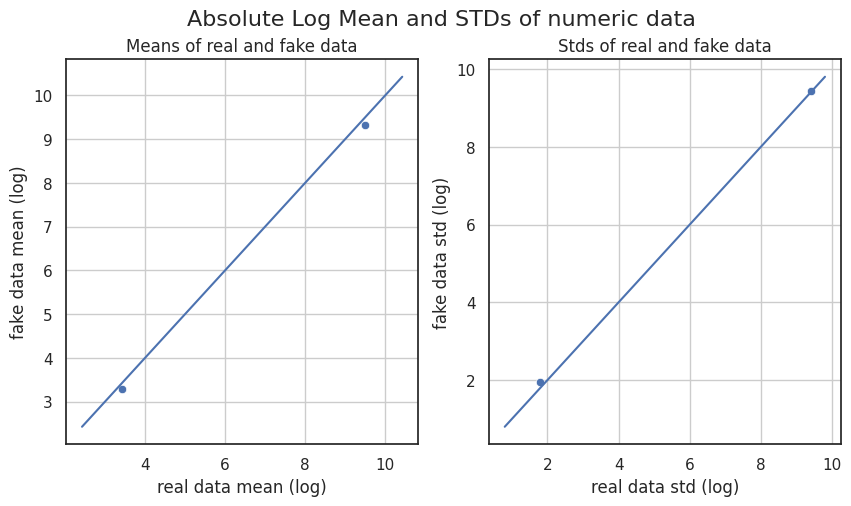

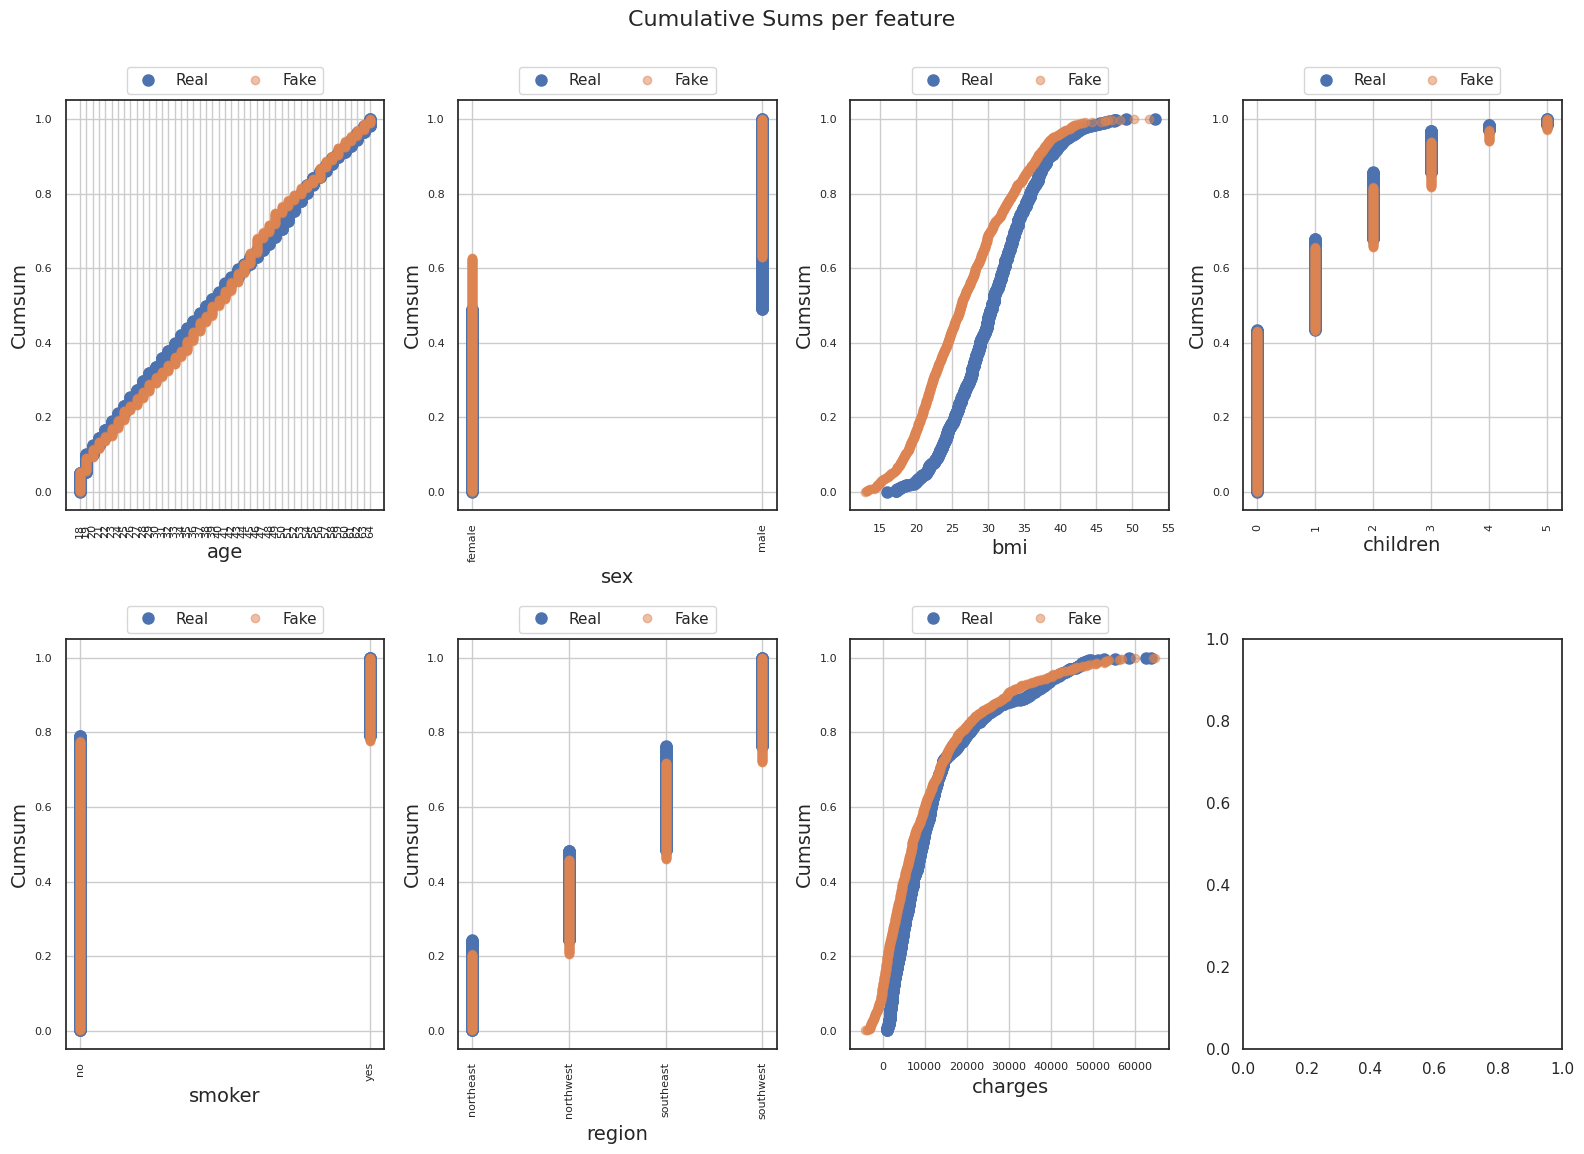

/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(axes[i].get_xticklabels(), rotation='vertical')
/usr/local/lib/python3.10/dist-packages/table_evaluator/table_evaluator.py:182: UserWarning: FixedFormat

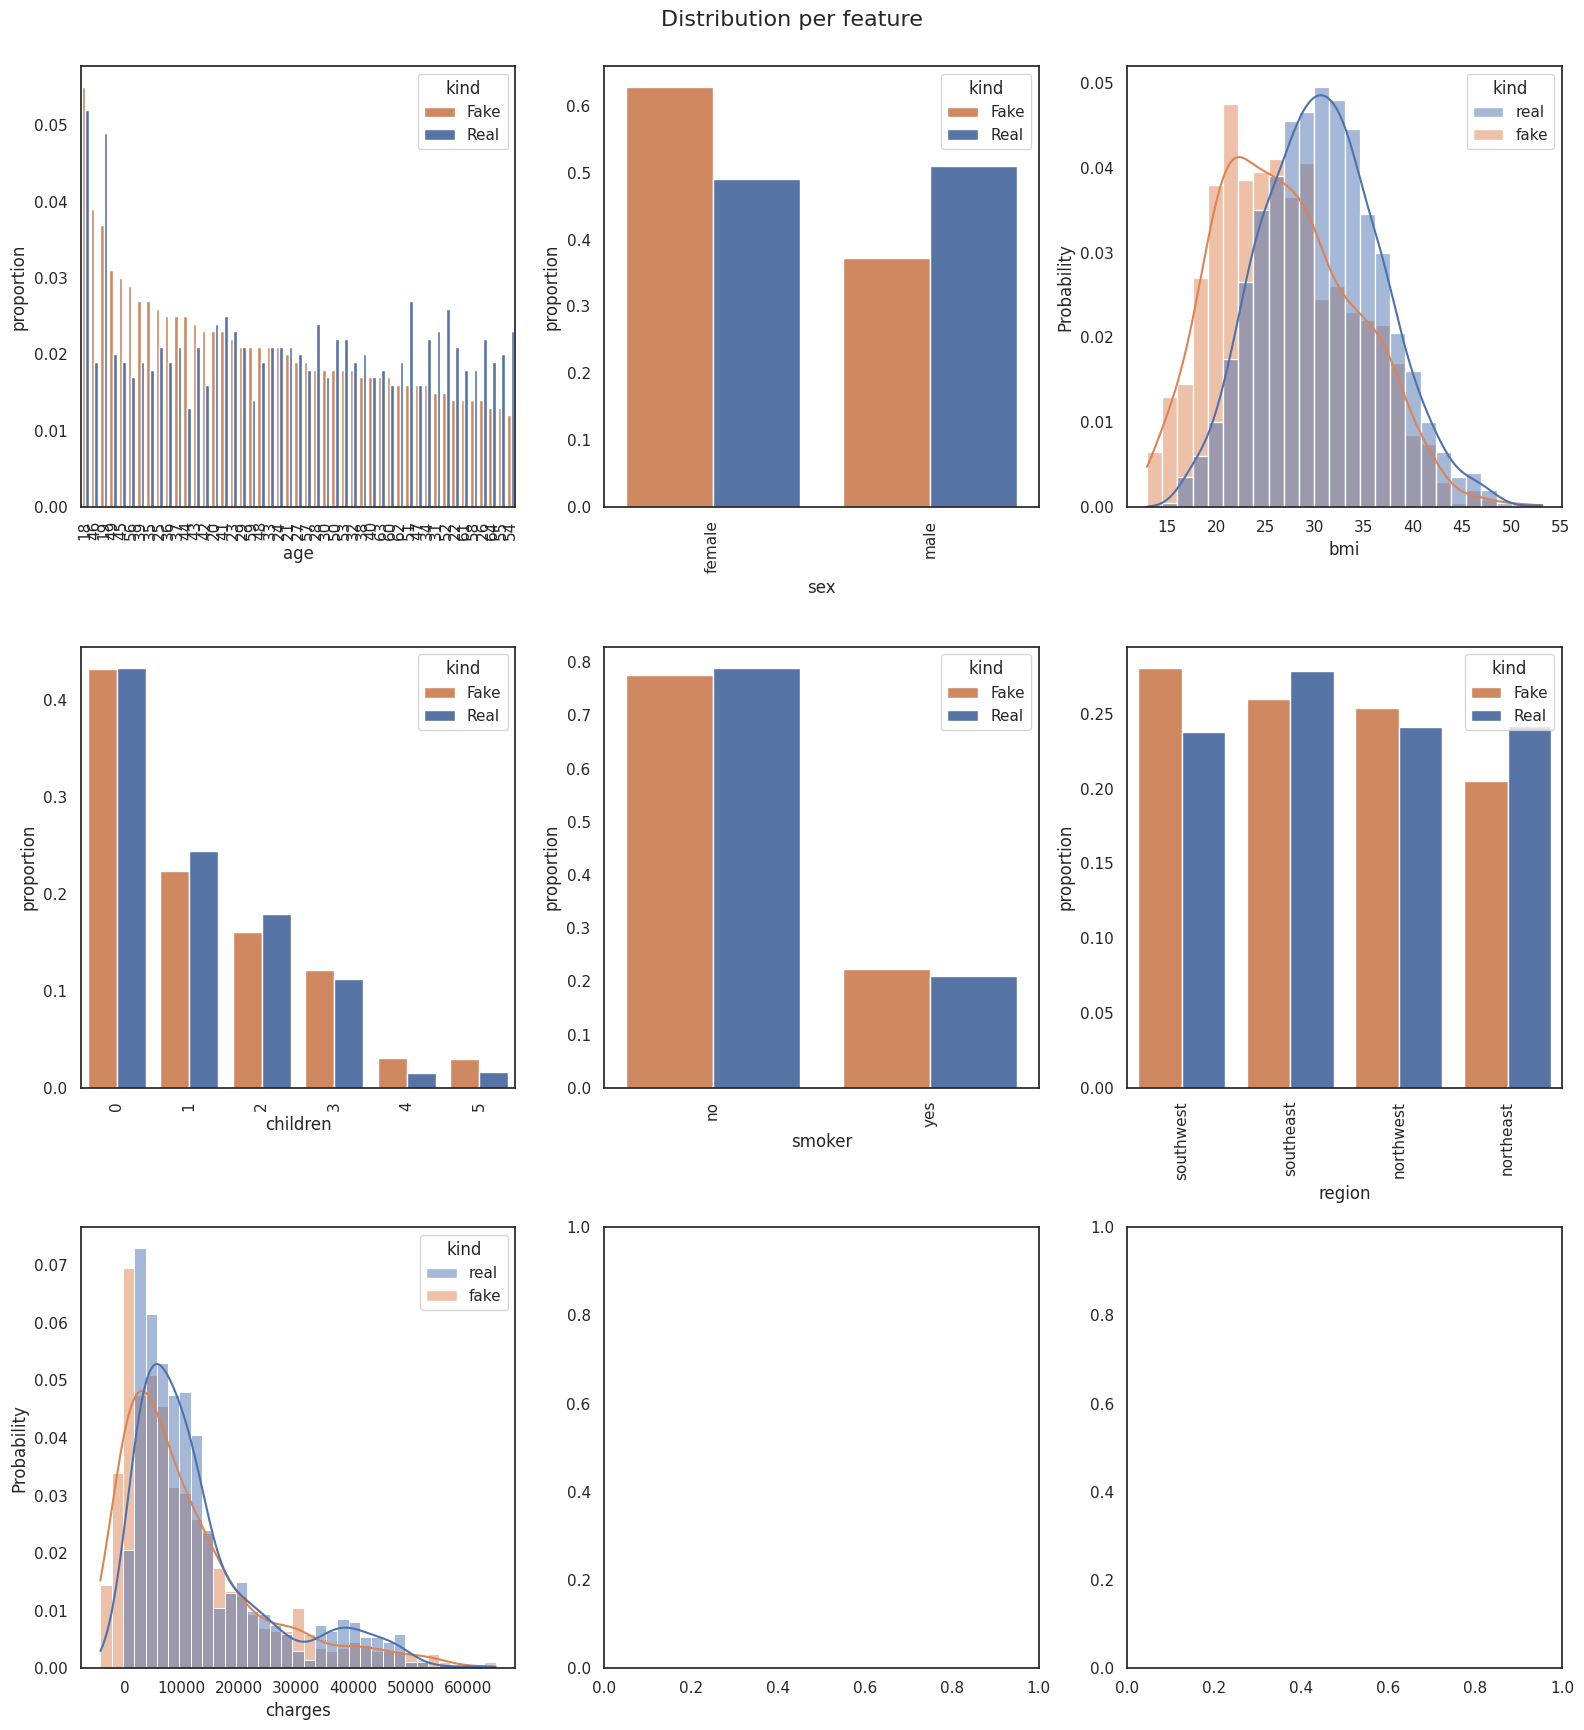

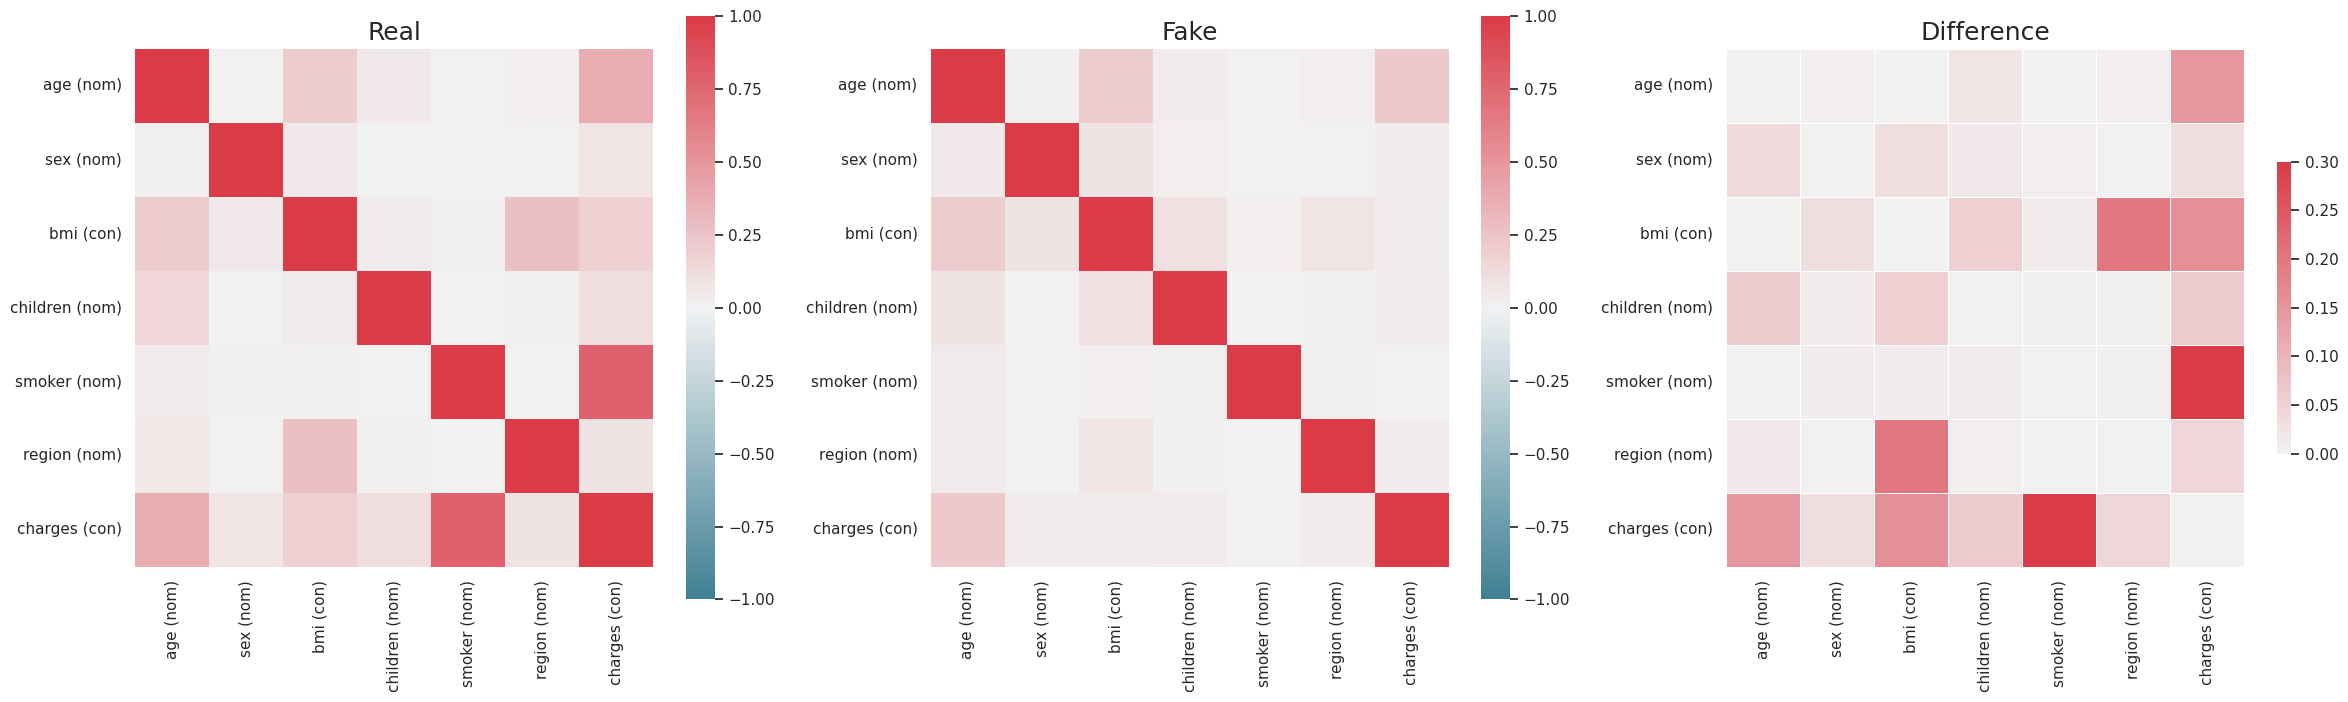

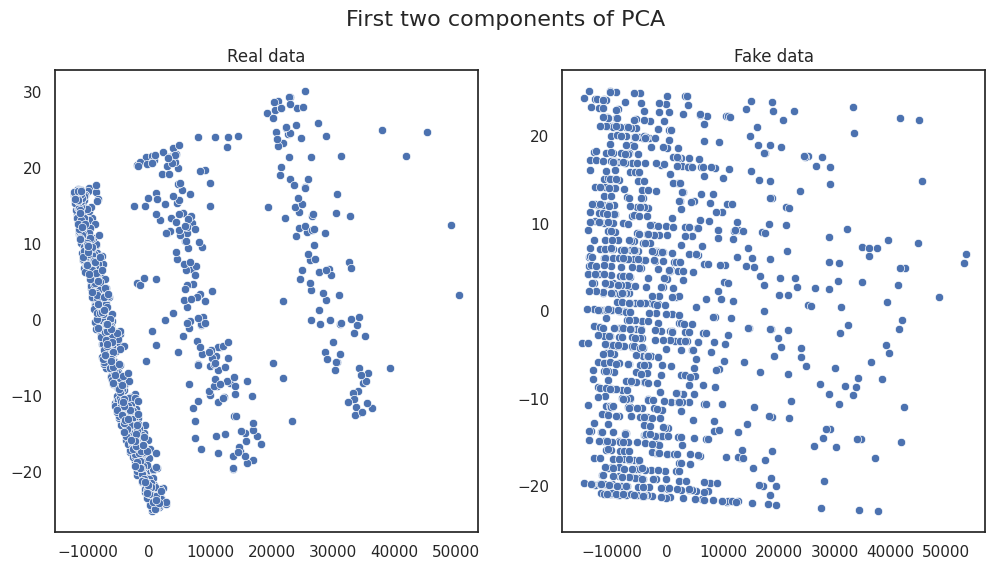

In [ ]:
from table_evaluator import TableEvaluator

print(data.shape, samples.shape)
table_evaluator =  TableEvaluator(data, samples, cat_cols= categorical_features)

table_evaluator.visual_evaluation()